In [1]:
# prompt: Mount

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
pip install scikit-learn imbalanced-learn


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '/content/drive/MyDrive/Internship/archive (7)/WineQT.csv'
wine_data = pd.read_csv(file_path)

# Drop the 'Id' column as it's irrelevant for prediction
if 'Id' in wine_data.columns:
    wine_data = wine_data.drop(columns=['Id'])

# Separate features and target
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

# Train Random Forest model
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

# Train SGD model
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)
print("\nStochastic Gradient Descent Classifier Report:")
print(classification_report(y_test, sgd_predictions))
print("Accuracy:", accuracy_score(y_test, sgd_predictions))

# Train SVC model
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
print("\nSupport Vector Classifier Report:")
print(classification_report(y_test, svc_predictions))
print("Accuracy:", accuracy_score(y_test, svc_predictions))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           3       0.99      1.00      0.99        97
           4       0.93      0.97      0.95        92
           5       0.80      0.70      0.75       108
           6       0.68      0.63      0.66        95
           7       0.82      0.97      0.89        96
           8       1.00      0.98      0.99        92

    accuracy                           0.87       580
   macro avg       0.87      0.87      0.87       580
weighted avg       0.87      0.87      0.87       580

Accuracy: 0.8706896551724138

Stochastic Gradient Descent Classifier Report:
              precision    recall  f1-score   support

           3       0.88      0.84      0.86        97
           4       0.41      0.63      0.50        92
           5       0.60      0.31      0.41       108
           6       0.26      0.31      0.28        95
           7       0.40      0.42      0.41        96
           8       0.7

Chemical Qualities: Analyzing features like density and acidity as predictors for wine quality.


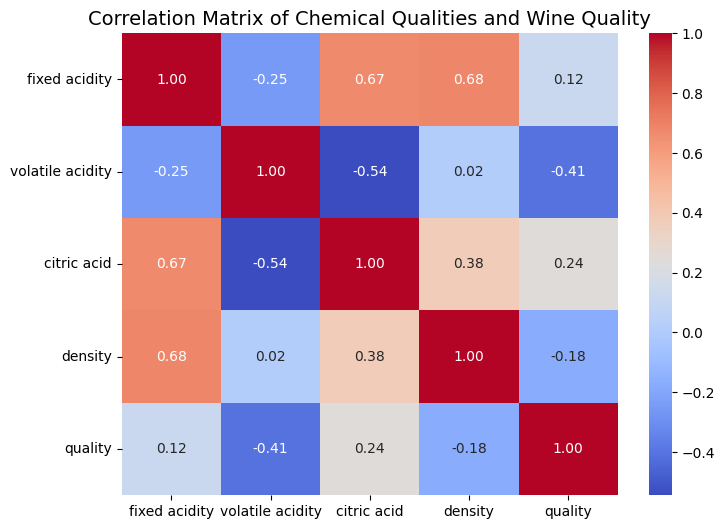

Random Forest Classifier Report:
              precision    recall  f1-score   support

           3       0.99      1.00      0.99        97
           4       0.93      0.97      0.95        92
           5       0.80      0.70      0.75       108
           6       0.68      0.63      0.66        95
           7       0.82      0.97      0.89        96
           8       1.00      0.98      0.99        92

    accuracy                           0.87       580
   macro avg       0.87      0.87      0.87       580
weighted avg       0.87      0.87      0.87       580

Accuracy: 0.8706896551724138

Stochastic Gradient Descent Classifier Report:
              precision    recall  f1-score   support

           3       0.88      0.84      0.86        97
           4       0.41      0.63      0.50        92
           5       0.60      0.31      0.41       108
           6       0.26      0.31      0.28        95
           7       0.40      0.42      0.41        96
           8       0.7

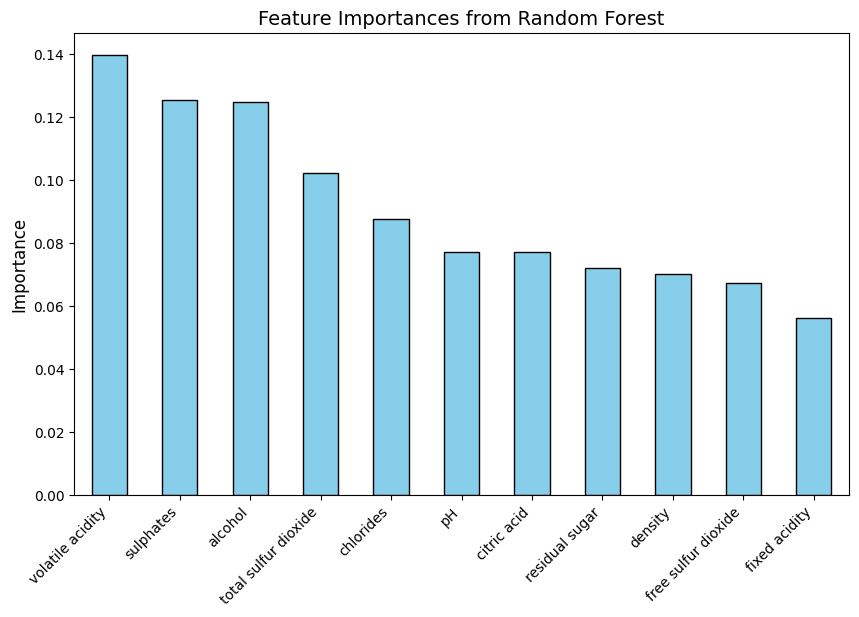

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '/content/drive/MyDrive/Internship/archive (7)/WineQT.csv' # Corrected file path
wine_data = pd.read_csv(file_path)

# Drop the 'Id' column as it's irrelevant for prediction
if 'Id' in wine_data.columns:
    wine_data = wine_data.drop(columns=['Id'])

# Separate features and target
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

# Analyze correlation of chemical qualities with quality
chemical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'density']
correlation_matrix = wine_data[chemical_features + ['quality']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Chemical Qualities and Wine Quality", fontsize=14)
plt.show()

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

# Train Random Forest model
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

# Train SGD model
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)
print("\nStochastic Gradient Descent Classifier Report:")
print(classification_report(y_test, sgd_predictions))
print("Accuracy:", accuracy_score(y_test, sgd_predictions))

# Train SVC model
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
print("\nSupport Vector Classifier Report:")
print(classification_report(y_test, svc_predictions))
print("Accuracy:", accuracy_score(y_test, svc_predictions))

# Feature Importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Importances from Random Forest", fontsize=14)
plt.ylabel("Importance", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


Data Analysis Libraries: Employing Pandas for data manipulation and Numpy for array
operations.

Data Loading:

In [14]:
wine_data = pd.read_csv(file_path)
print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Column Dropping:

In [15]:
wine_data = wine_data.drop(columns=['Id'])
print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Feature and Target Separation:

In [16]:
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']
print(X.head())
print(y.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
0    5
1

Correlation Analysis:

In [17]:
correlation_matrix = wine_data[chemical_features + ['quality']].corr()
print(correlation_matrix)


                  fixed acidity  volatile acidity  citric acid   density  \
fixed acidity          1.000000         -0.250728     0.673157  0.681501   
volatile acidity      -0.250728          1.000000    -0.544187  0.016512   
citric acid            0.673157         -0.544187     1.000000  0.375243   
density                0.681501          0.016512     0.375243  1.000000   
quality                0.121970         -0.407394     0.240821 -0.175208   

                   quality  
fixed acidity     0.121970  
volatile acidity -0.407394  
citric acid       0.240821  
density          -0.175208  
quality           1.000000  


Feature Importances:

In [11]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)


NumPy
Array Standardization:

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


SMOTE Output Handling:

In [13]:
X_resampled, y_resampled = smote.fit_resample(X, y)


Data Visualization: Using Seaborn and Matplotlib for visualizing patterns and insights in the
dataset.

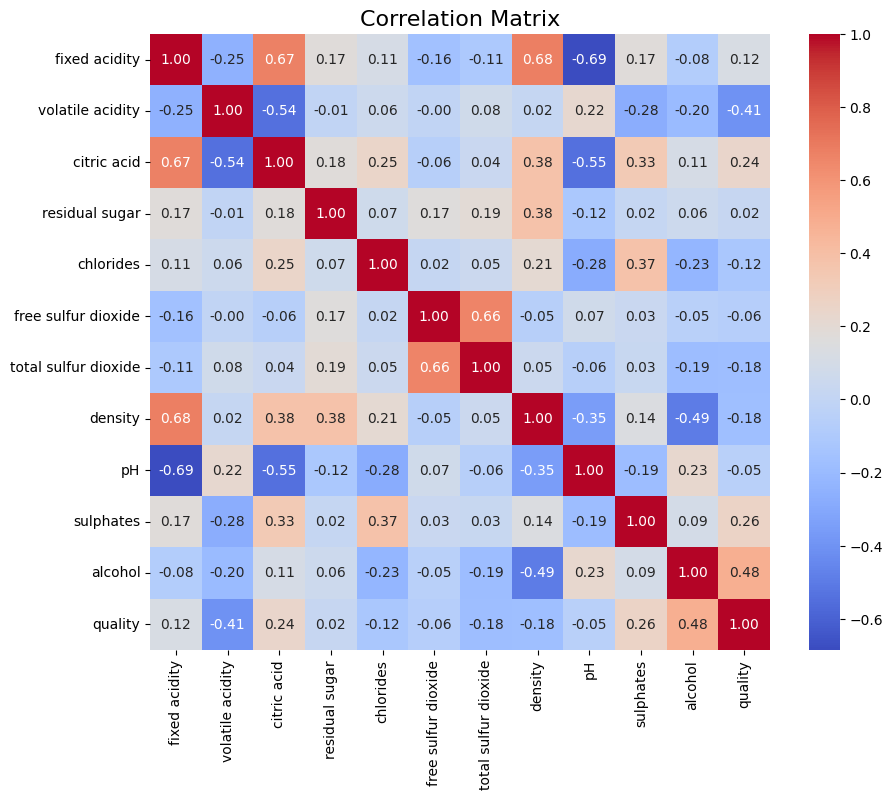

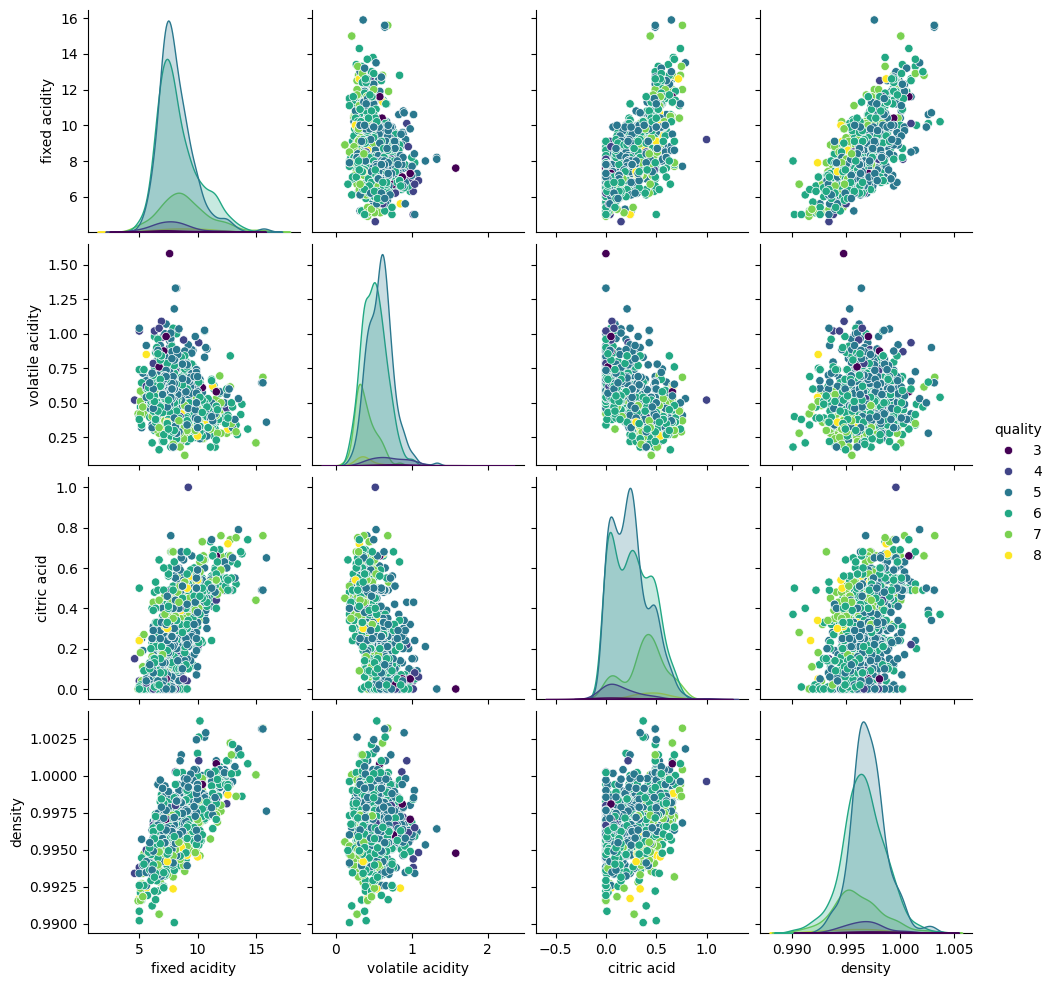

<ipython-input-19-bbe71e543171>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='volatile acidity', data=wine_data, palette='Set2')


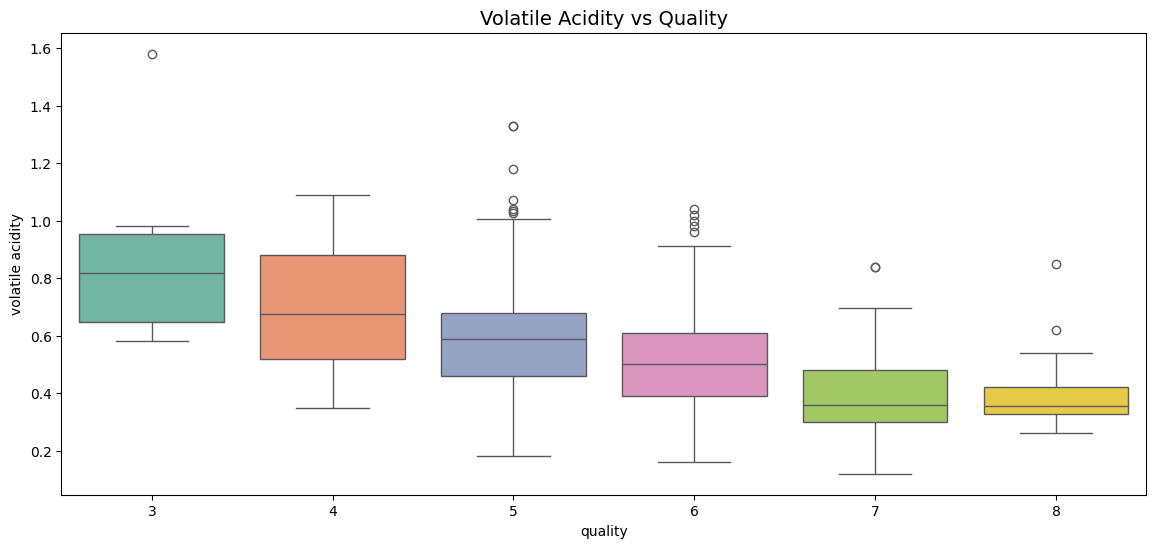

<ipython-input-19-bbe71e543171>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='fixed acidity', data=wine_data, palette='Set2')


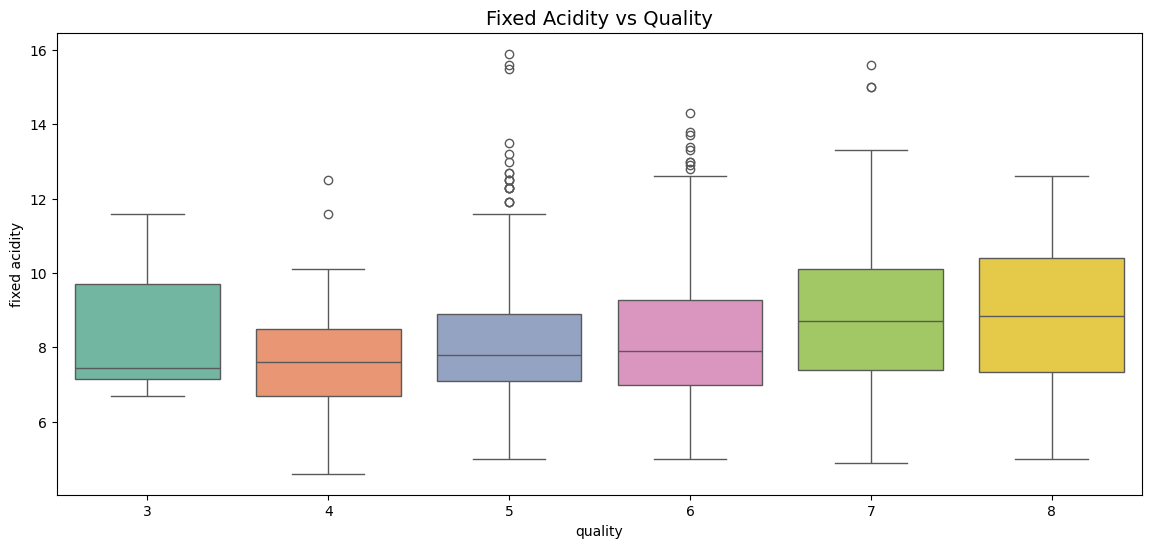

<ipython-input-19-bbe71e543171>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='pastel', edgecolor='black')


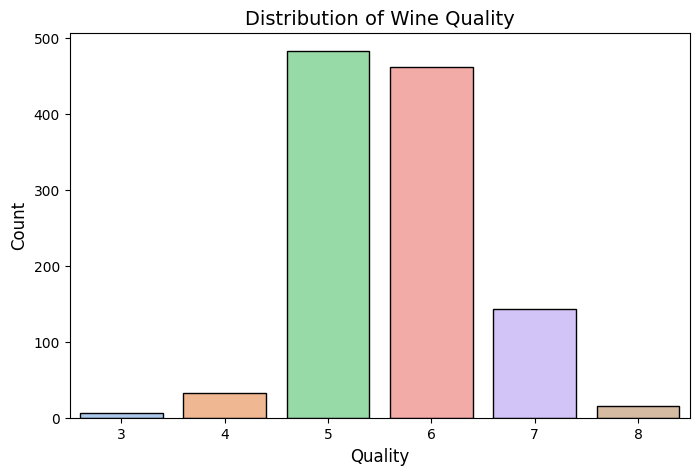

Random Forest Classifier Report:
              precision    recall  f1-score   support

           3       0.99      1.00      0.99        97
           4       0.93      0.97      0.95        92
           5       0.80      0.70      0.75       108
           6       0.68      0.63      0.66        95
           7       0.82      0.97      0.89        96
           8       1.00      0.98      0.99        92

    accuracy                           0.87       580
   macro avg       0.87      0.87      0.87       580
weighted avg       0.87      0.87      0.87       580

Accuracy: 0.8706896551724138

Stochastic Gradient Descent Classifier Report:
              precision    recall  f1-score   support

           3       0.88      0.84      0.86        97
           4       0.41      0.63      0.50        92
           5       0.60      0.31      0.41       108
           6       0.26      0.31      0.28        95
           7       0.40      0.42      0.41        96
           8       0.7

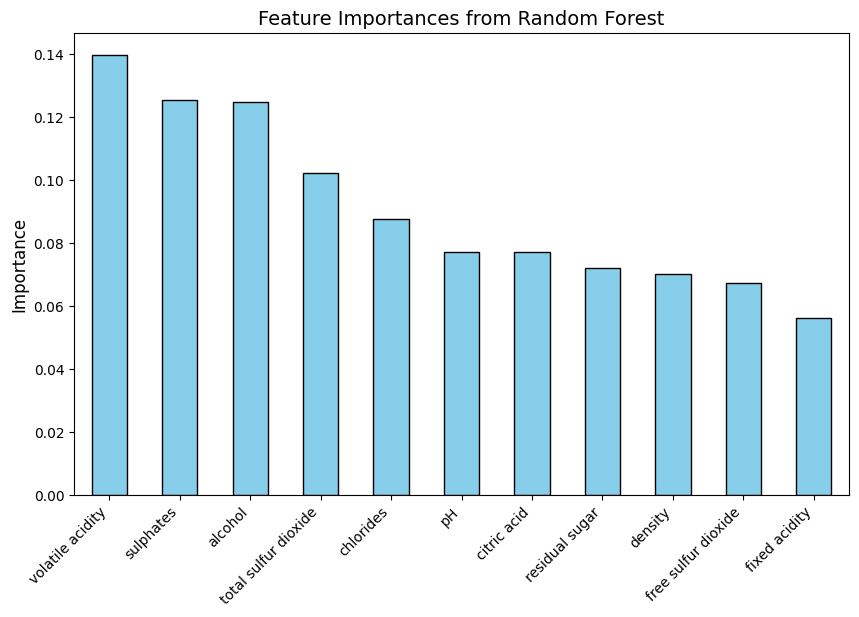

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '/content/drive/MyDrive/Internship/archive (7)/WineQT.csv' # Changed file path to match the file path in other parts of your notebook
wine_data = pd.read_csv(file_path)

# Drop the 'Id' column as it's irrelevant for prediction
if 'Id' in wine_data.columns:
    wine_data = wine_data.drop(columns=['Id'])

# Separate features and target
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

# Data Visualization
# 1. Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# 2. Pairplot for Selected Features
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'quality']
sns.pairplot(wine_data[selected_features], hue='quality', palette='viridis')
plt.show()

# 3. Boxplots for Feature Distributions Across Quality Levels
plt.figure(figsize=(14, 6))
sns.boxplot(x='quality', y='volatile acidity', data=wine_data, palette='Set2')
plt.title("Volatile Acidity vs Quality", fontsize=14)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='quality', y='fixed acidity', data=wine_data, palette='Set2')
plt.title("Fixed Acidity vs Quality", fontsize=14)
plt.show()

# 4. Distribution of Quality Classes
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=wine_data, palette='pastel', edgecolor='black')
plt.title("Distribution of Wine Quality", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

# Train Random Forest model
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

# Train SGD model
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)
print("\nStochastic Gradient Descent Classifier Report:")
print(classification_report(y_test, sgd_predictions))
print("Accuracy:", accuracy_score(y_test, sgd_predictions))

# Train SVC model
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
print("\nSupport Vector Classifier Report:")
print(classification_report(y_test, svc_predictions))
print("Accuracy:", accuracy_score(y_test, svc_predictions))

# Feature Importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Importances from Random Forest", fontsize=14)
plt.ylabel("Importance", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()
